/home/joseaverde/artificial_vision_final/jose/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/joseaverde/artificial_vision_final/jose/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


['/home/joseaverde/artificial_vision_final/jose/.venv/lib/python3.12/site-packages/ipykernel_launcher.py', '-f', '/home/joseaverde/.local/share/jupyter/runtime/kernel-26235a37-3151-4674-acbb-eb4ef863073d.json']


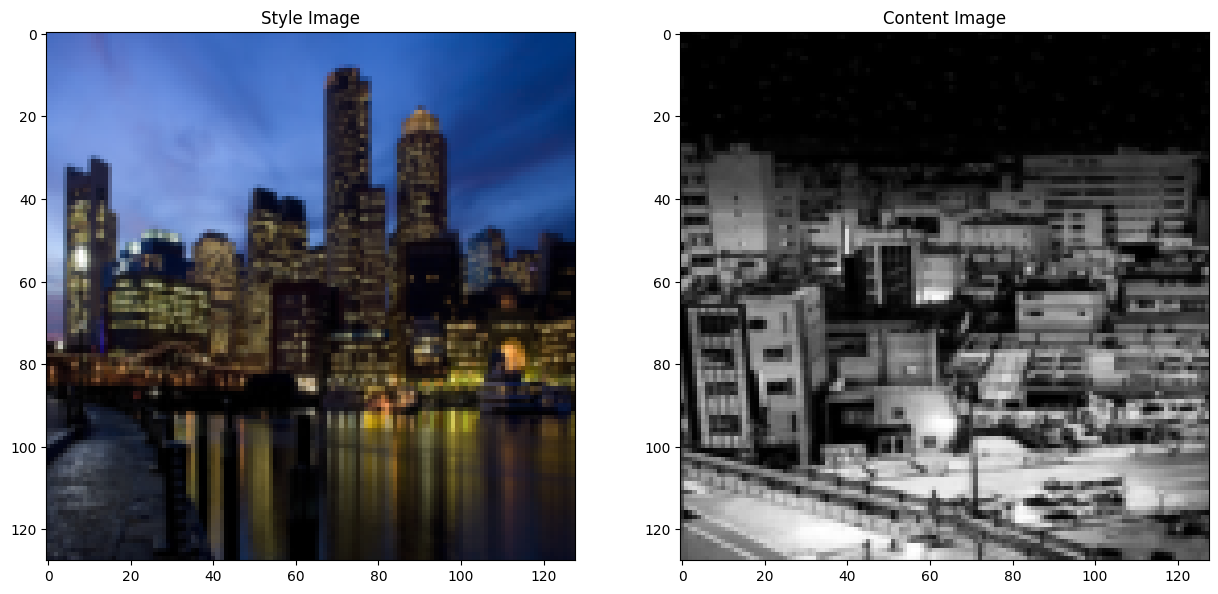

In [1]:
from neural_style import *
from scipy.ndimage import gaussian_filter
import os
import sys

print(sys.argv)
root = os.path.join(os.path.dirname(os.getcwd()), "cesar", "neural_style", "images")

style_image = Image(path=os.path.join(root, "photorealistic", "style", "tar3.png"))
content_image = Image(path=os.path.join(root, "manga", "city-1.jpg"))

fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=2,figsize=(15,15))
ax0, ax1 = axes.flatten()
style_image.show(title='Style Image',ax=ax0)
content_image.show(title='Content Image',ax=ax1)

Building the style transfer model..
Optimizing..
run [100]:
Style Loss : 80.978050 Content Loss: 33.728523

run [200]:
Style Loss : 32.549088 Content Loss: 32.134457

run [300]:
Style Loss : 21.161322 Content Loss: 30.022680

Building the style transfer model..
Optimizing..
run [100]:
Style Loss : 141.313370 Content Loss: 51.409927

run [200]:
Style Loss : 38.201771 Content Loss: 44.624775

run [300]:
Style Loss : 18.139454 Content Loss: 38.416046

run [400]:
Style Loss : 11.737000 Content Loss: 33.837757

run [500]:
Style Loss : 9.327744 Content Loss: 30.956907

run [600]:
Style Loss : 8.437482 Content Loss: 28.858688

run [700]:
Style Loss : 10.005862 Content Loss: 27.160011

run [800]:
Style Loss : 6.764431 Content Loss: 25.882423

run [900]:
Style Loss : 6.271692 Content Loss: 24.853817



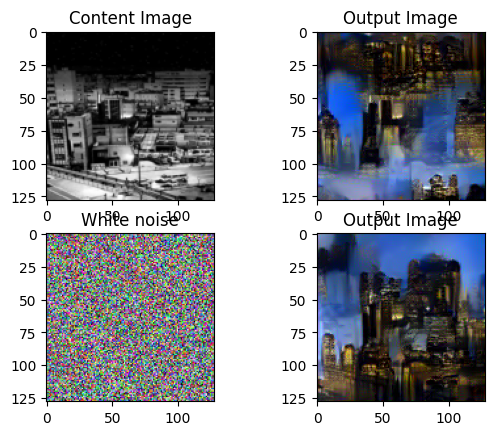

In [4]:
# Generate a folder to save results
result_dir='results'
exp_dir=os.path.join(result_dir,'exp2')
if not os.path.exists(exp_dir):
    os.makedirs(exp_dir)

# Content image
input_image = content_image.clone()

# add the original input image to the figure:
fig, axes = matplotlib.pyplot.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = axes.flatten()
input_image.show(title='Content Image',ax=ax1)
input_image.save(os.path.join(exp_dir,'input_content.png'))


output = run_style_transfer(cnn, cnn_normalization_mean(), cnn_normalization_std(),
                            content_image, style_image, input_image, num_steps=300,print_step=100)

output.show(title='Output Image',ax=ax2)
output.save(os.path.join(exp_dir,'output_content_300.png'))


# White noise
input_image = Image(image=torch.randn(content_image.raw_image.data.size(), device=device()))
input_image.show(title='White noise',ax=ax3)
# Gaussian smooth
input_image=gaussian_filter(input_image.raw_image.squeeze().permute(1,2,0).cpu().numpy(), 3.0)
input_image=input_image-input_image.min()
input_image=input_image/input_image.max()
input_image=torch.from_numpy(numpy.ascontiguousarray(numpy.transpose(input_image,(2,0,1)))).unsqueeze(0).to(device(),torch.float)
input_image = Image(image=input_image)
input_image.save(os.path.join(exp_dir,'input_noise.png'))
output = run_style_transfer(cnn, cnn_normalization_mean(), cnn_normalization_std(),
                            content_image, style_image, input_image, num_steps=900,print_step=100)

output.show(title='Output Image',ax=ax4)
output.save(os.path.join(exp_dir,'output_noise.png'))